# Human OR Fetal Development

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.pylab as plt
import matplotlib.patches as patches
import matplotlib.cm as cm
import re
import math

In [2]:
# Replace this with your actual main directory path
dir_main =  "/Users/yvon.mbouamboua/Documents/projects/singlecell/hudeca_nasal/data/ORs" # ← update this
# Construct the file path
#file_path = os.path.join(dir_main,  "Human_ORs_bioMart.xlsx")
file_path = os.path.join(dir_main,  "Human_OSNs_ORs_bioMart.xlsx")
# Read Excel file
ORs = pd.read_excel(file_path)

# Define chromosome order as strings
chr_order = [str(i) for i in range(1, 23)] + ['X']

# Filter to keep only rows where Chromosome is 1–22 or X
ORs = ORs[ORs['Chromosome'].astype(str).str.fullmatch(r'([1-9]|1[0-9]|2[0-2]|X)')]

# Set categorical type to enforce chromosome order
ORs['Chromosome'] = pd.Categorical(ORs['Chromosome'], categories=chr_order, ordered=True)

# Sort by Chromosome
ORs = ORs.sort_values('Chromosome')
ORs


,family,subfamily,Gene_name,Position,Gene_stable_ID,Gene_stable_ID_version,Gene_description,Chromosome,Gene_start,Gene_end,Karyotype_band,Strand,family_subfamily_chromosome,OSN_count,avg_expr
0,4.0,F,OR4F5,1:65419-71585,ENSG00000186092,ENSG00000186092.7,olfactory receptor family 4 subfamily F member...,1,65419,71585,p36.33,1,4F1,1,0.713129
32,2.0,L,OR2L8,1:247948858-247949796,ENSG00000279263,ENSG00000279263.1,olfactory receptor family 2 subfamily L member...,1,247948858,247949796,q44,1,2L1,0,0.000000
33,2.0,AK,OR2AK2,1:247965233-247966386,ENSG00000187080,ENSG00000187080.10,olfactory receptor family 2 subfamily AK membe...,1,247965233,247966386,q44,1,2AK1,0,0.000000
34,2.0,L,OR2L5,1:248013660-248024276,ENSG00000197454,ENSG00000197454.2,olfactory receptor family 2 subfamily L member...,1,248013660,248024276,q44,1,2L1,1,1.024504
35,2.0,L,OR2L2,1:248030070-248042305,ENSG00000203663,ENSG00000203663.4,olfactory receptor family 2 subfamily L member...,1,248030070,248042305,q44,1,2L1,4,0.880697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371,1.0,M,OR1M1,19:9087061-9095669,ENSG00000170929,ENSG00000170929.6,olfactory receptor family 1 subfamily M member...,19,9087061,9095669,p13.2,1,1M19,0,0.000000
369,4.0,F,OR4F17,19:107104-117102,ENSG00000176695,ENSG00000176695.8,olfactory receptor family 4 subfamily F member...,19,107104,117102,p13.3,1,4F19,1,0.729645
378,7.0,C,OR7C1,19:14789260-14835376,ENSG00000127530,ENSG00000127530.4,olfactory receptor family 7 subfamily C member...,19,14789260,14835376,p13.12,-1,7C19,6,2.529250
389,11.0,H,OR11H1,22:15528192-15529139,ENSG00000130538,ENSG00000130538.6,olfactory receptor family 11 subfamily H membe...,22,15528192,15529139,q11.1,1,11H22,0,0.000000


In [3]:
dic_cts = dict(zip(ORs['Gene_name'],ORs['avg_expr']))
dic_cts

{'OR4F5': 0.7131293059147643,
 'OR2L8': 0.0,
 'OR2AK2': 0.0,
 'OR2L5': 1.024504316514388,
 'OR2L2': 0.8806974519741393,
 'OR2L3': 1.369917779173322,
 'OR2L13': 0.0,
 'OR2M5': 0.0,
 'OR2M2': 2.427997169756877,
 'OR2M3': 2.506692415735099,
 'OR2M4': 1.578872678120488,
 'OR2T33': 0.4838549188838908,
 'OR2T12': 1.413807700405247,
 'OR2M7': 0.9588717960843526,
 'OR14C36': 0.0,
 'OR2T4': 0.0,
 'OR2T6': 3.05973698013882,
 'OR2T1': 3.428097427517592,
 'OR2T2': 2.019154591973225,
 'OR2T3': 0.0,
 'OR2T5': 0.0,
 'OR2G6': 1.715836405731285,
 'OR2T29': 1.49158168656709,
 'OR2T10': 0.0,
 'OR2T11': 1.285961114235682,
 'OR2T35': 1.865185765992857,
 'OR2T27': 0.0,
 'OR14I1': 2.023947925010611,
 'OR2AJ1': 1.280990068368174,
 'OR2T8': 0.0,
 'OR2T34': 0.0,
 'OR11L1': 0.0,
 'OR4F29': 0.0,
 'OR4F16': 0.0,
 'OR10T2': 0.0,
 'OR10K2': 1.788584491447471,
 'OR10K1': 2.457613944816488,
 'OR10R2': 0.0,
 'OR6Y1': 3.658775374517766,
 'OR6P1': 0.0,
 'OR10X1': 0.0,
 'OR10Z1': 2.573460472976629,
 'OR2W3': 0.0,
 'OR6K3'

In [4]:
chr_dic = dict(zip(ORs["Gene_name"], ORs["Chromosome"]))
chr_dic

{'OR4F5': '1',
 'OR2L8': '1',
 'OR2AK2': '1',
 'OR2L5': '1',
 'OR2L2': '1',
 'OR2L3': '1',
 'OR2L13': '1',
 'OR2M5': '1',
 'OR2M2': '1',
 'OR2M3': '1',
 'OR2M4': '1',
 'OR2T33': '1',
 'OR2T12': '1',
 'OR2M7': '1',
 'OR14C36': '1',
 'OR2T4': '1',
 'OR2T6': '1',
 'OR2T1': '1',
 'OR2T2': '1',
 'OR2T3': '1',
 'OR2T5': '1',
 'OR2G6': '1',
 'OR2T29': '1',
 'OR2T10': '1',
 'OR2T11': '1',
 'OR2T35': '1',
 'OR2T27': '1',
 'OR14I1': '1',
 'OR2AJ1': '1',
 'OR2T8': '1',
 'OR2T34': '1',
 'OR11L1': '1',
 'OR4F29': '1',
 'OR4F16': '1',
 'OR10T2': '1',
 'OR10K2': '1',
 'OR10K1': '1',
 'OR10R2': '1',
 'OR6Y1': '1',
 'OR6P1': '1',
 'OR10X1': '1',
 'OR10Z1': '1',
 'OR2W3': '1',
 'OR6K3': '1',
 'OR6N1': '1',
 'OR6K2': '1',
 'OR6N2': '1',
 'OR14A16': '1',
 'OR1C1': '1',
 'OR14K1': '1',
 'OR6K6': '1',
 'OR6F1': '1',
 'OR13G1': '1',
 'OR14A2': '1',
 'OR2G2': '1',
 'OR2C3': '1',
 'OR2B11': '1',
 'OR10J5': '1',
 'OR10J1': '1',
 'OR2G3': '1',
 'DAPL1': '2',
 'OR6B2': '2',
 'OR6B3': '2',
 'OR5K2': '3',
 'OR5K1':

In [5]:

pos_dic = {
    gene: (start + end) / 2
    for gene, start, end in zip(ORs["Gene_name"], ORs["Gene_start"], ORs["Gene_end"])
}
pos_dic

{'OR4F5': 68502.0,
 'OR2L8': 247949327.0,
 'OR2AK2': 247965809.5,
 'OR2L5': 248018968.0,
 'OR2L2': 248036187.5,
 'OR2L3': 248055121.5,
 'OR2L13': 248098173.5,
 'OR2M5': 248145617.0,
 'OR2M2': 248177944.0,
 'OR2M3': 248205095.0,
 'OR2M4': 248238048.0,
 'OR2T33': 248273946.5,
 'OR2T12': 248296781.5,
 'OR2M7': 248324099.0,
 'OR14C36': 248349244.0,
 'OR2T4': 248362146.0,
 'OR2T6': 248383778.5,
 'OR2T1': 248405534.0,
 'OR2T2': 248450618.5,
 'OR2T3': 248473829.0,
 'OR2T5': 248489851.0,
 'OR2G6': 248517705.0,
 'OR2T29': 248559842.0,
 'OR2T10': 248594093.5,
 'OR2T11': 248629324.0,
 'OR2T35': 248640817.0,
 'OR2T27': 248652683.0,
 'OR14I1': 248690452.0,
 'OR2AJ1': 247930114.0,
 'OR2T8': 247921702.0,
 'OR2T34': 248574279.0,
 'OR11L1': 247841412.0,
 'OR4F29': 451209.0,
 'OR4F16': 686185.0,
 'OR10T2': 158398994.0,
 'OR10K2': 158422223.5,
 'OR10K1': 158466215.5,
 'OR10R2': 158476578.0,
 'OR6Y1': 158549477.5,
 'OR6P1': 158565593.0,
 'OR10X1': 158579409.0,
 'OR10Z1': 158608891.0,
 'OR2W3': 247896059.0

In [6]:

# Define chromosome-to-number mapping for human genome
def chrom_to_num(chrom):
    if chrom == 'X':
        return 23
    elif chrom == 'Y':
        return 24
    elif chrom in ['MT', 'M']:
        return 25
    else:
        try:
            return int(chrom)
        except ValueError:
            return None  # skip invalid chromosomes

# Filter out invalid or nan chromosome entries
unique_chrs = [str(i) for i in np.unique(list(chr_dic.values())) 
               if str(i).lower() not in ['nan', 'none'] and not (isinstance(i, float) and math.isnan(i))]

# Build mapping using the chrom_to_num function
dicnumchr = {str(i): chrom_to_num(str(i)) for i in unique_chrs if chrom_to_num(str(i)) is not None}

# OR genes in pos_dic and chr_dic
ors_sorted = np.array([o for o in dic_cts if o in pos_dic and o in chr_dic and chr_dic[o] in dicnumchr])

# Sort by chr number + position
isorted = np.argsort([dicnumchr[chr_dic[o]] * 1e10 + pos_dic[o] for o in ors_sorted])
ors_sorted = ors_sorted[isorted]

/var/folders/km/8h7qg1817m7gygf9pyqz_hv4_j20yx/T/ipykernel_61358/1289333344.py:40: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("rainbow", len(chrom_set))


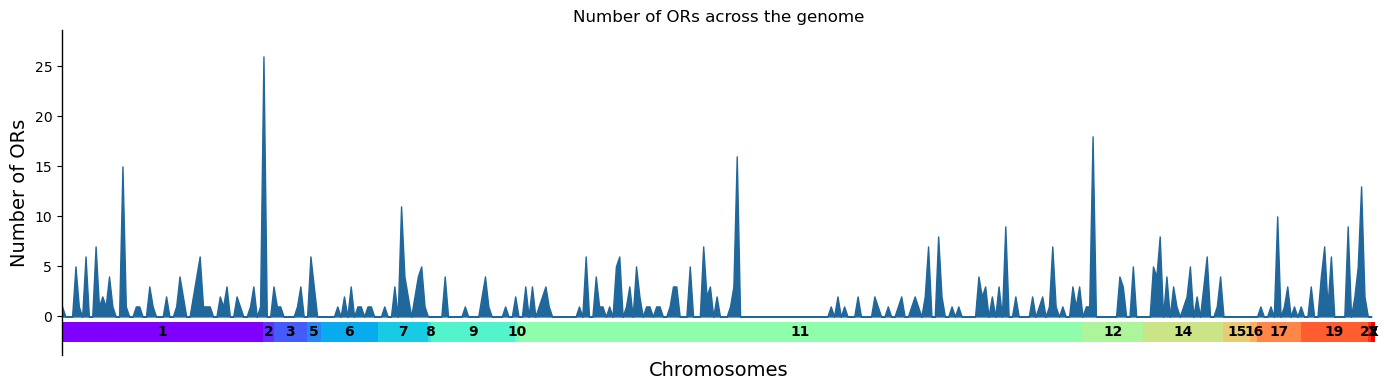

In [11]:

# Prepare data
valid_chr_genes = [g for g in chr_dic if chr_dic[g] is not None and chrom_to_num(chr_dic[g]) is not None]
ors_valid = [g for g in dic_cts if g in pos_dic and g in chr_dic and chrom_to_num(chr_dic[g]) is not None]
dic_cts = dict(zip(ORs['Gene_name'],ORs['OSN_count']))

# Sort by genomic position
ors_sorted = sorted(
    ors_valid,
    key=lambda g: chrom_to_num(chr_dic[g]) * 1e10 + pos_dic[g]
)

vals = [dic_cts[g] for g in ors_sorted]
chroms = [chr_dic[g] for g in ors_sorted]

# Plot figure
fig, ax = plt.subplots(figsize=(14, 4))
ax.fill_between(range(len(vals)), vals, color='#20679B')

# Hide axis ticks and frame
ax.set_xticks([])
ax.spines['bottom'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(1)

ax.set_title('Number of ORs across the genome')

# X-label
ax.set_xlabel('Chromosomes', fontsize=14)

# Y-label only
ax.set_ylabel('Number of ORs', fontsize=14)

# Define bar position and height
y_bar = -0.1 * max(vals)
bar_height = 0.08 * max(vals)

# Unique chromosomes & colors
chrom_set = sorted(set(chroms), key=lambda c: chrom_to_num(c))
cmap = cm.get_cmap("rainbow", len(chrom_set))
chr_color_map = {chrom: cmap(i) for i, chrom in enumerate(chrom_set)}

# Draw chromosome-colored bar under plot
start = 0
current_chr = chroms[0]

for i, c in enumerate(chroms + ['END']):
    if i == len(chroms) or chroms[i] != current_chr:
        width = i - start
        rect = patches.Rectangle(
            (start, y_bar), width, bar_height,
            color=chr_color_map[current_chr],
            clip_on=False,
            linewidth=0
        )
        ax.add_patch(rect)
        mid = start + width / 2
        ax.text(mid, y_bar + bar_height / 2, str(current_chr), ha='center', va='center', fontsize=10, fontweight='bold')
        if i < len(chroms):
            start = i
            current_chr = chroms[i]

# Adjust plot limits
ax.set_xlim(0, len(vals))
ax.set_ylim(y_bar - 0.05 * max(vals), max(vals) + 0.1 * max(vals))

# Save the figure as PDF and PNG
output_path = "Fig_6f"  # change to your preferred path
plt.tight_layout()
plt.savefig(f"{output_path}.pdf", bbox_inches='tight', dpi=300)
plt.show()

/var/folders/km/8h7qg1817m7gygf9pyqz_hv4_j20yx/T/ipykernel_61358/1682967351.py:38: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("rainbow", len(chrom_set))


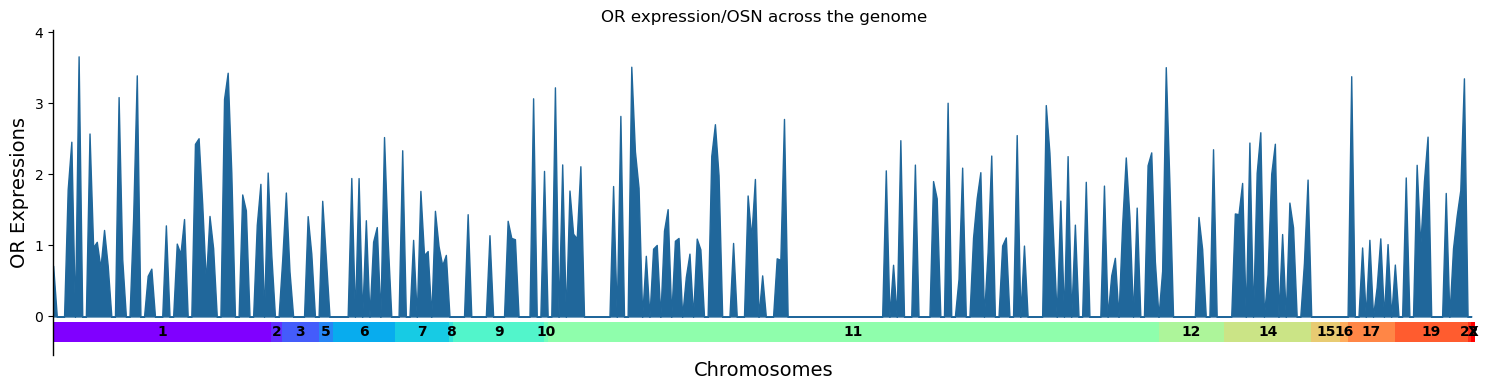

In [12]:

# Prepare data: expression dictionary should be defined
# Example: dic_expr = {'OR4F5': 0.45, 'OR4F29': 1.2, ...}
# Use dic_expr instead of dic_cts

dic_expr = dict(zip(ORs['Gene_name'], ORs['avg_expr']))
valid_chr_genes = [g for g in chr_dic if chr_dic[g] is not None and chrom_to_num(chr_dic[g]) is not None]
ors_valid = [g for g in dic_expr if g in pos_dic and g in chr_dic and chrom_to_num(chr_dic[g]) is not None]

# Sort genes by chromosome and position
ors_sorted = sorted(
    ors_valid,
    key=lambda g: chrom_to_num(chr_dic[g]) * 1e10 + pos_dic[g]
)

# Expression values
vals = [dic_expr[g] for g in ors_sorted]
chroms = [chr_dic[g] for g in ors_sorted]

# Plot
fig, ax = plt.subplots(figsize=(15, 4))
ax.fill_between(range(len(vals)), vals, color='#20679B')  # Pinkish for expression

# Hide axis ticks and frame
ax.set_xticks([])
ax.spines['bottom'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(1)

ax.set_title('OR expression/OSN across the genome')
ax.set_xlabel('Chromosomes', fontsize=14)
ax.set_ylabel('OR Expressions', fontsize=14)

# Colored chromosome bar
y_bar = -0.1 * max(vals)
bar_height = 0.08 * max(vals)
chrom_set = sorted(set(chroms), key=lambda c: chrom_to_num(c))
cmap = cm.get_cmap("rainbow", len(chrom_set))
chr_color_map = {chrom: cmap(i) for i, chrom in enumerate(chrom_set)}

start = 0
current_chr = chroms[0]

for i, c in enumerate(chroms + ['END']):
    if i == len(chroms) or chroms[i] != current_chr:
        width = i - start
        rect = patches.Rectangle(
            (start, y_bar), width, bar_height,
            color=chr_color_map[current_chr],
            clip_on=False,
            linewidth=0
        )
        ax.add_patch(rect)
        mid = start + width / 2
        ax.text(mid, y_bar + bar_height / 2, str(current_chr), ha='center', va='center', fontsize=10, fontweight='bold')
        if i < len(chroms):
            start = i
            current_chr = chroms[i]

# Final adjustments
ax.set_xlim(0, len(vals))
ax.set_ylim(y_bar - 0.05 * max(vals), max(vals) + 0.1 * max(vals))

# Save the figure as PDF and PNG
output_path = "Fig_6g"  # change to your preferred path
plt.tight_layout()
plt.savefig(f"{output_path}.pdf", bbox_inches='tight', dpi=300)
plt.show()